In [1]:
# Modelo Deep Learning que determina a qué categoría pertenece una noticia
# Dataset: keras.reuters

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import models, layers

from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [11]:
# Vectorizar los datos
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [14]:
# Definición del modelo
# Sequential model, the simplest type of Keras model
model = models.Sequential()

# Input_shape=10000: Especifica que cada muestra tiene 10000 características (1D array)
model.add(layers.Input(shape=(10000,)))

# Core of the model: 3 Dense layers

# units=64: This specifies there are 64 neurons in this layer
# Activation function for the neuron: 'relu'
model.add(layers.Dense(64, activation='relu'))

# units=64: This specifies there are 64 neurons in this layer
# Activation function for the neuron: 'relu'
model.add(layers.Dense(64, activation='relu'))

# units=46: This specifies there are 46 neuros in this layer
# Activation function for the neuron: 'softmax'
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Divido las muestras y etiquetas de training en dos grupos
# 1 - 1.000     : x_val, y_val: 
# 1.000 - 8.982: partial_x_train, partial_y_train

# Muestras 0 - 1.000 de training -> Muestras de validación del entrenamiento
x_val = x_train[:1000]

# Muestras 1.000 - 8.982 de training -> Muestras de entrenamiento
partial_x_train = x_train[1000:]

# Etiquetas 0 - 1.000 de training -> Etiquetas de validación del entrenamiento
y_val = train_labels[:1000]

# Etiquetas 1.000 - 8.982 de training -> Etiquetas de entrenamiento
partial_y_train = train_labels[1000:]

In [15]:
print("Entrenamiento del modelo")
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Entrenamiento del modelo
Epoch 1/20


2026-01-02 19:19:52.022131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.4787 - loss: 2.6396 - val_accuracy: 0.6210 - val_loss: 1.8451
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6774 - loss: 1.5509 - val_accuracy: 0.6960 - val_loss: 1.4076
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7457 - loss: 1.1860 - val_accuracy: 0.7490 - val_loss: 1.2062
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7973 - loss: 0.9650 - val_accuracy: 0.7620 - val_loss: 1.1025
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8295 - loss: 0.8001 - val_accuracy: 0.7850 - val_loss: 1.0181
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8587 - loss: 0.6696 - val_accuracy: 0.7960 - val_loss: 0.9931
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8829 - loss: 0.5585 - val_accuracy: 0.7900 - val_loss: 0.9638
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9015 - loss: 0.4743 - val_accuracy: 0.7950 - val_loss: 0.929

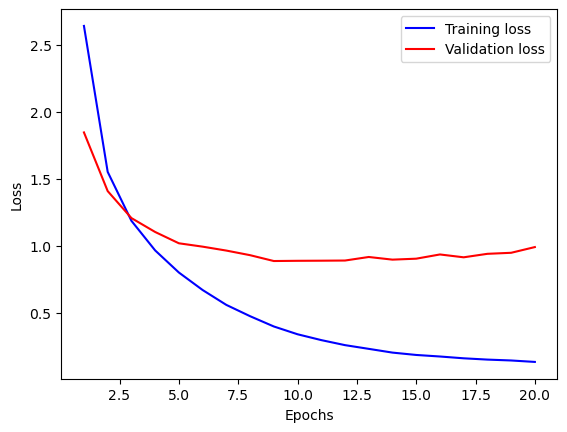

In [16]:
import matplotlib.pyplot as plt

history_dict = history.history

# La clave 'loss' devuelve una lista con los valores de la función de pérdida con los datos de apredizaje para cada epoch
loss_values = history_dict['loss']

# La clave 'val_loss' devuelve una lista con los valores de la función de pérdida con los datos de validación para cada epoch
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, color='blue', label='Training loss')
plt.plot(epochs, val_loss_values, color='red', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

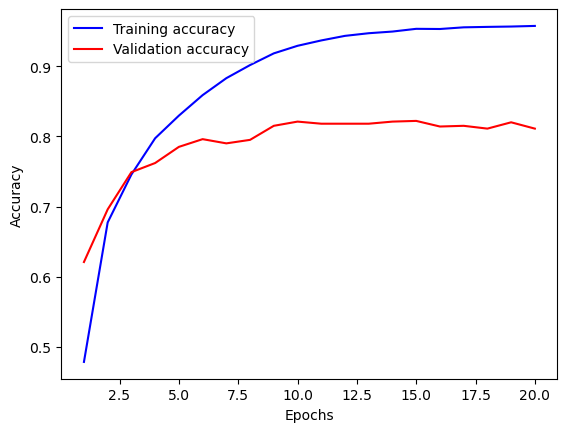

In [17]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, color='blue', label='Training accuracy')
plt.plot(epochs, val_acc, color='red', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.legend()
plt.show()